# Step 1: Business Problem Understanding

Dream Housing Finance company deals in all kinds of home loans.They have presence across all urban, semi urban and rural areas.
Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form.
These details are Gender, Martial Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have provided a dataset to identify the customers
segments that are eligible for loan 
amount so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('LoanData.csv')
data.head() # past data -> already completed

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Step 2: Data Understanding

- Loan_ID : Unique Loan ID
- Gender : Male/Female
- Married : Applicant married
- Dependents : Number of dependents
- Education : Applicant Education
- Self_Employed : whether the applicant is Self employed
- Applicant Income : Applicant Income in dollar's 
- Coapplicant Income : Coapplicant income dollar's 
- LoanAmount : Loan amount in thousands dollar's 
- Loan_Amount_Term : Term of loan in months
- Credit_History : credit history meets guidelines
- Property_Area : Urban/Semi Urban/Rural
- Loan_Status : Loan approved __target variable__

In [3]:
# Loan_Status -> output variable

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.columns # first step start with the renaming the columns
# if any columns names is wrong then rename it properly is the first step 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data['Loan_ID'].nunique() # Loan_ID is a unique value it is not important for me 
# so cross checking how many unique values are there 
# for 614 records 614 unique records are there 
# nunique means no. of unique values or apply the len() function or .shape  -> total no. of records
# data['Loan_ID'].unique() -> it will give the all the unique value in 1D array                

614

__Drop unimportant columns as per feature Selection (Filter Methods)__

In [7]:
data.drop(columns=["Loan_ID"],inplace=True) # as this column is not important so i am dropping that column
# so first column was dropped 

In [8]:
data["Gender"].unique()
# now second column gender check the categories because it is a categorical variable 
# if it is a continous variable i have to check the minimum value,  maximum value, standard deviation value, mean value 

# nan ->> missing values 

array(['Male', 'Female', nan], dtype=object)

In [9]:
data["Gender"].value_counts() # so mode is Male 
# whatever the thing i am observed that i am write in notes 

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
# now column no. 3 
data["Married"].unique()# so it is also having two categories , and also some missing values 

array(['No', 'Yes', nan], dtype=object)

In [11]:
data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
# now column no. 4 -> it is a Count Variable
data["Dependents"].unique() 

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
# '3+' is in string format but count should be in int format 
# in this column wrong data is there wrong datatype is also there 
# that we have to write in the notes so that in data cleaning first we treat the wrong data followed by wrong data type 

In [14]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
# so write in notes that this particular column is having some wrong data with wrong data type 

In [16]:
# now column no. 5 'Education' 
data["Education"].unique() 

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
# so it is also a categorical variable 

In [18]:
data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [19]:
# so for all categorical variables and count variable (which is discrete) we apply unique() and value_counts()
# for Discrete Variable we apply the unique() and value_counts()

In [20]:
data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
# means for this paricular company more number of non self employed means more no.of salaried people are applying 
# less number of less salaried people are applying for this particular company 

__Create New Columns as per requirements__

In [23]:
# loan company check income in the combination of both ApplicantIncome and CoapplicantIncome based on that they are going to give the loan
# sometime the coapplicant people are not there so the coapplicant should be 0 
# if any misssing value are there within a coapplicant it has to consider as a 0 means that person not having the coapplicant the income is 0

In [24]:
# if the person is having the coapplicant then you combine the applicant and coapplicant 

In [25]:
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]   # ex: Father + son combining apply for the loan
  
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [26]:
data["Income"].describe() # for continous variable we apply the describe() function and observe min to max values 

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [27]:
# so here we not replace the outliers , not remove the outliers , we retrain the outliers
# for this particular column we are retrain the outlier -> it completely depends on Business Problem

In [28]:
# Loan_Amount_Term is a count variable   # how many months  # ex: 360 months = 30 years

data["Loan_Amount_Term"].unique() # it is in float, due to 1 missing value everything is in float# later we converted it into int

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [29]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
data["Credit_History"].unique() # 1 => good credit history 0 => bad credit history
# it is a discrete categorical which is already encoded 

array([ 1.,  0., nan])

In [31]:
# let us bring back to original data as of now
data["Credit_History"] = data["Credit_History"].replace({1:'good',0:'bad'}) # later we do again encoding 

In [32]:
data["Credit_History"].unique() 

array(['good', 'bad', nan], dtype=object)

In [33]:
data["Credit_History"].value_counts()# so credit history also categorical variable 

good    475
bad      89
Name: Credit_History, dtype: int64

In [34]:
data["Property_Area"].unique() # in different areas they are going to give the Loan

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [35]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [36]:
data["Loan_Status"].unique() # output variable # in my output variable only 2 categories are there either Yes or No 
# so it is a Binary Classification project 

array(['Y', 'N'], dtype=object)

In [37]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [38]:
continous = ["Income", "LoanAmount"]

discrete_categorical = ["Gender", "Married", "Education", "Self_Employed",
                       "Credit_History", "Property_Area", "Loan_Status"]  #property_Area has only three categories rest all are having two categories

discrete_count = ["Dependents", "Loan_Amount_Term"]

__Exploratory Data Analysis (EDA)__

__for continous Variables__

In [39]:
data[continous].describe() # for continous variable we use describe() function and 

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


In [40]:
# now we take the sub plot , using the subplot we observing the Histogram between (Income & LoanAmount)
# for continous variable we apply Histogram and Boxplot 
# for discrete variable we apply Bar plot or Count plot  

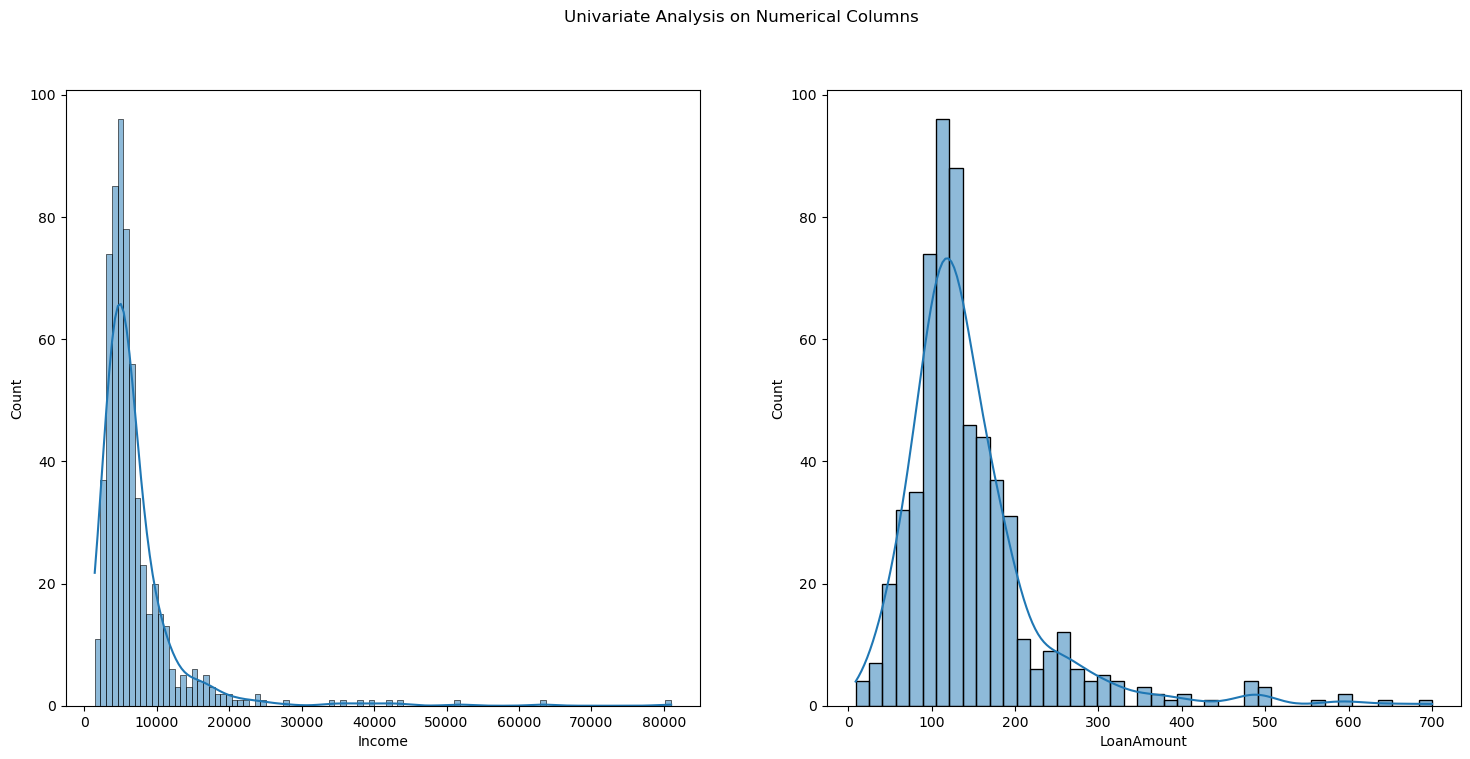

In [41]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(data['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [42]:
# so we can see both are Right Skewed Data
# most of the people having income between 0 to 10000 (dollars)
# most of the people apply Loan between 0 to 200 (thousands dollars)-> 0-2lakh dollar's 
# who are having high income obviously they apply for the high Loan only na. 

In [43]:
# now we apply the heat map with correlation coefficient

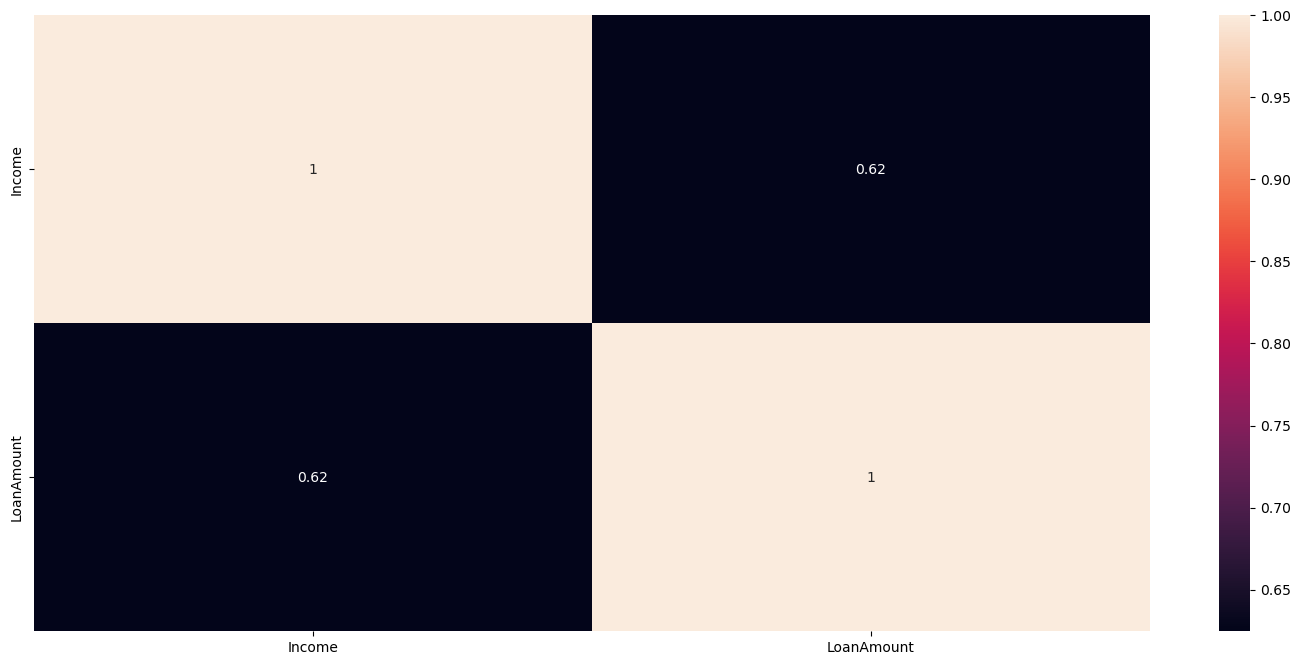

In [44]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

In [45]:
# the corelation is also 0.62 is there , it is not crossing 0.8 , so there is no colinearity problem

In [46]:
# now pair plot -> for continous variable we apply the pair plot

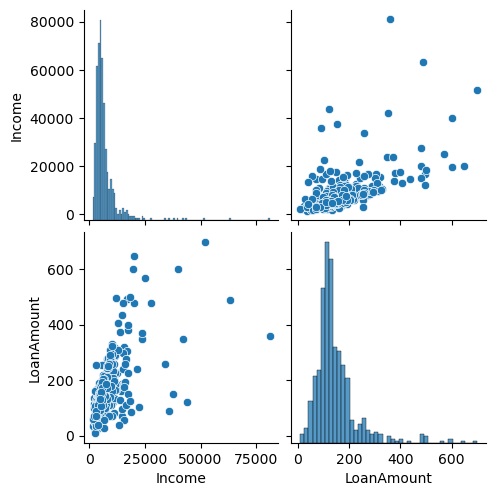

In [47]:
sns.pairplot(data[continous])
plt.show()

__For Discrete Variables__

In [48]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


In [49]:
# for discrete variable we apply the count plot

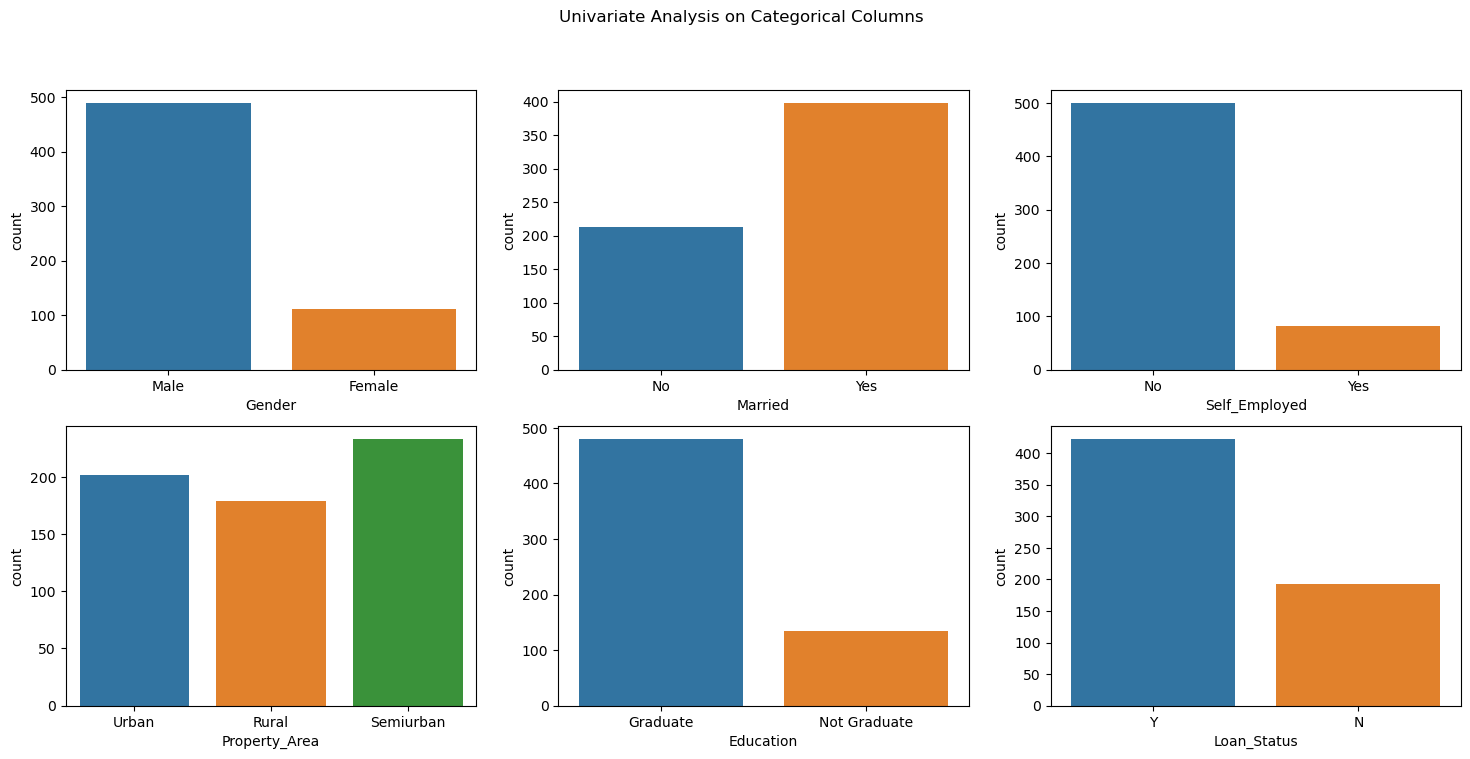

In [50]:
plt.rcParams['figure.figsize'] = (18,8)
    
plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

__check for Missing Values__

In [51]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

__check for Skewness__

In [52]:
data[continous].skew() # Income column heavily Right Skewed # LoanAmount is also Right Skewed
# both of them are right skewed 

Income        5.633449
LoanAmount    2.677552
dtype: float64

__check outliers__

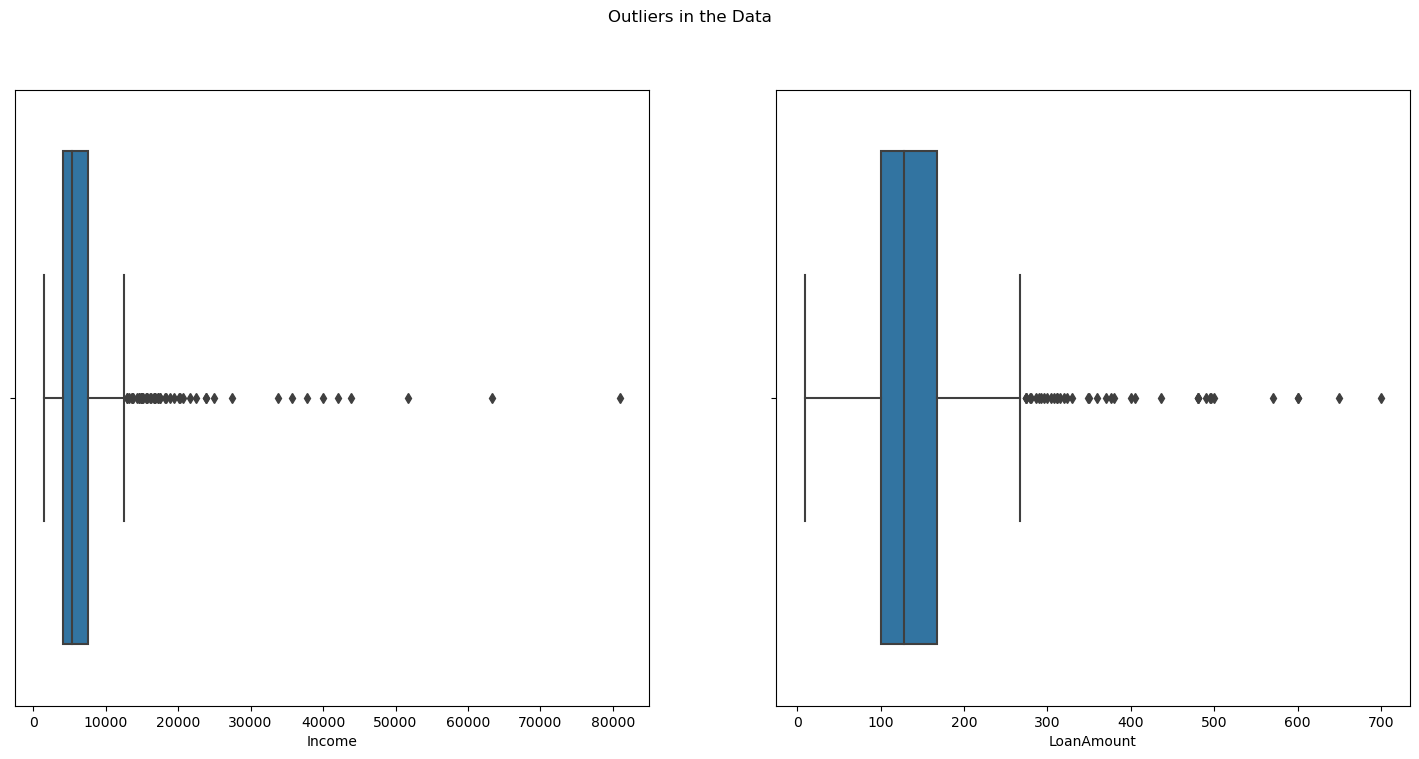

In [53]:
# lets visualize the outliers using Box Plot

plt.subplot(1, 2, 1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

In [54]:
# till now we completed the step:2 Data Understanding
# in the data understanding we observed each and every columns whatever are there
# so here in the data understanding we done the univariate , single columns only we have observed 
# but in data analysis(step 4) we are going to apply the Bivariate analysis , multiple columns we have observed
# what is Bivariate Analysis ? what is the Average salary of Males , average salary of female by apply the groupby()
# within male how many are married and how many are not married by applying the crosstab() b/w 2 caategorical variables
# within the males how many are Loan eligible and within the female how many are comes under Loan eligible 
# these all are comes under Data Analysis 

In [55]:
# now third step Data Preprocessing , now we have to clean the data
# now earlier whatever the mistake we have observed that is multiple columns have missing value , which column has wrong data,
# wrong data type , so whatever we observed earlier now i did data cleaning accordingly in sequential order 

# Step 3: Data Preprocessing

In [56]:
# first we start with the wrong data
# so first we replace the wrong data 

__Wrong Data treatment__

In [57]:
data['Dependents'] = data['Dependents'].replace({'3+':3})# '3+' is the wrong data 

In [58]:
data['Dependents'].unique() # '3+' replace with '3'

array(['0', '1', '2', 3, nan], dtype=object)

In [59]:
data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [60]:
# for every line of code ask yourself why? you write this line of code only 

In [61]:
# so whenever we want to fill the value 2 options will be there 
# replace with the original data # replace research/Logics 
# replace statistically (by applying mean, median, mode)

In [62]:
# and you can also connect with backend team for missing values

# hi team,
# the following data is missing for doing analysis ,
# please check and try to provide data at the earliest
# thankyou

# if they reply : this is only the data we received from the client  , we cant do anything ,you have to do analysis on the given data only 
# then we do with the statistical replacement

# till they send the confirmation mail we do the research 
# and once we get the original data we replace with the original data by using the iloc[]
# by using the iloc we fill each and every cell separately 
# once we fill all the values then we do the preprocessing 

In [63]:
# so we replace statistically the missing values
# 'Gender', 'Married', 'Self_Employed' -> These three column we replace with mode 
# 'Dependents' -> for 'Dependents' we fill the missing values with 0
# all these are discrete variable
# 'Income' is also having the missing value but we not fill the income value because income value is directly proportional to loan
# if the person income is low and i filled with the high value it will impact heavyly so i cant take the risk on the 
# 'Income','LoanAmount','Loan_Amount_Term','Credit_History' they all directly impact on the Loan eligibility    
# ex: if the person is not having the good credit history but i have filled with the mode , having the good credit history 
# i filled with good , then a bad person will be selected as the good person and they will give the Loan and company have the loss

__Missing Values Treatment__

In [64]:
data['Dependents'] = data['Dependents'].fillna(0) # if the person not write the no. of dependents then 0 dependents are there

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History']) # drop the missing values,we should not replace 
# never we should replace because if we replace that one it would heavily impact  # we cant take the risk
# so for these column ['Income','LoanAmount','Loan_Amount_Term','Credit_History'] we drop the missing values we cant replace them

In [65]:
data.isnull().sum() # all the missing value has been treated

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

__Data type conversion__

In [66]:
data["Dependents"] = data["Dependents"].astype('int') # string converted to int 
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int') 

In [67]:
data['Loan_Amount_Term'].unique() # due to one missing value everything has been given as a float   
# whenever there is missing value in the numerical data the data type consider as the float 
# now it is converted to int

array([360, 120, 180,  60, 300, 480, 240,  36,  84])

__outliers treatment__

In [68]:
# outliers should be retrained (because really some people will have high income)

__Encoding__

In [69]:
data["Gender"] = data["Gender"].replace({'Male':1,'Female':0})
data["Married"] = data["Married"].replace({'Yes':1,'No':0})
data["Education"] = data["Education"].replace({'Graduate':1,'Not Graduate':0})
data["Self_Employed"] = data["Self_Employed"].replace({'Yes':1,'No':0})
data["Credit_History"] = data["Credit_History"].replace({'good':1,'bad':0})
data["Property_Area"] = data["Property_Area"].replace({'Rural':0,'Semiurban':1,'Urban':2})
data["Loan_Status"] = data["Loan_Status"].replace({'Y':1,'N':0})

data["Loan_Amount_Term"] = data["Loan_Amount_Term"]/12  # converted months  to years

In [70]:
# so here most important part is Encoding 
# the Encoding is done on the Categorical variables
# discrete_categorical = ["Gender", "Married", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Status"]
# out of which "Loan_Status" is output variable

In [71]:
# These have ["Gender", "Married", "Education", "Self_Employed", "Credit_History", "Loan_Status"] two categories
# if you apply Label Encoder , Dummy Encoder , Odinal Encoder answer remain same no difference

# all of them are have two categories but property_area has three categories

# but ["Property_Area"] has three categories
# now here Dummy Encoding, Label Encoding, Odinal Encoding will be different because 
# if you apply dummies you get two new columns 
# but if you apply LabelEncoder or OdinalEncoder , answer remain same no difference, only one column as it is 
# but dummy Encoder will create two new columns 

In [72]:
# now whether i have to apply Dummy Encoding or whether i have apply the Odinal Encoding?
# in ["Property_Area"] three categories are there ->  Rural, Semiurban, Urban 
# can we apply > < symol ex:  Rural < Semiurban < Urban 
# generally we think everything are same in Nominal Encoding but no they are not same (for personal loan it consider as nominal)
# but because it is a Housing Loan , where the property is located ,the cost of the property is dependent on location wise 
# so Rural < Semiurban < Urban they are consider as odinal variable 
# here business problem is important 
# for this business problem it is Odinal but if it is a Personal Loan then it is Nominal in that case we apply the dummy encoding
# but here we apply the Odinal Encoding 

__transformations__

In [73]:
data[['Income','LoanAmount']].skew() # both are right skewed before transformations

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [74]:
from scipy.stats import boxcox
data["Income"],a = boxcox(data["Income"])
data["LoanAmount"],c = boxcox(data["LoanAmount"])

In [75]:
data[['Income','LoanAmount']].skew() # now both the skewness have brought to Normal Distribution after apply the boxcox

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [76]:
# so till here our step 3 Data Preprocessing have been completed with these :
# Dependents we replace 
# Missing value we have fill
# data type conversion 
# Encoding
# Transform the data 
# so this is the order in data preprocessing 
# for the future data also we have to do same data preprocessing then you have giveit to the model otherwise it give Error 
# Latest data only we have to share to the model 
# first we have to do the Data preprocessing then we share to the model. 

In [77]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856069
610,1,1,3,1,0,4.460305,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388070,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1,1.866991


In [78]:
# after applying the boxcox LoanAmount & Income has reduced
# so that why we converted Loan_Amount_Term divided by 12 -> data["Loan_Amount_Term"]/12 to reduced 
# because all of them are in the same range 

#if you not converted years ? nothing happens, no difference because it is a discrete_count_variable it will not have the impact
# feature scaling should be applied only when the continous variable
# one continous variable is having low magnitude and another continous variable is having the high magnitude 
# in that case only feature scaling 
# for feature scaling discrete variable is not applicable, even if you dont do also no problem

__X&y__

In [79]:
X = data.drop("Loan_Status",axis=1)  # input # other than Loan_Status everything is input
y = data["Loan_Status"]             # output # Loan_Status is output

__train-test split__

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70) 

In [81]:
# so till here Step 3: Data Preprocessing also completed 
# so we do the complete Data Cleaning and complete Data Wrangling 
# for scaling: we not need to apply scaling because both the continous variables are on the same scale 
# we having only two continous variables that to both are on same Scale , so no need of future scaling in this case 

In [82]:
#How to identify the best random_state number ? apply the for loop, there is no GridSearchCV for identifying the best random state no.

In [83]:
# now applying the various algorithm and also evaluating each of them 
# and finally select which one is best  
# since it is a binary classification algorithm so we apply following Algorithms 

# Step 4: Modelling & Evaluation

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 1. Logistic Regression

In [85]:
# Modelling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

# Evaluation
ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


In [86]:
# so it is a good model not the best model 

## 2. KNN

- HPT
- Modelling & Evaluation

In [87]:
# for KNN we have to do the Hyperparameter Tuning because we not know what is the number of n_neighbors

In [88]:
# In KNN hyperparameter are n_neighbors

In [89]:
# Hyperparameter tuning
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [90]:
# so n_neighbors=14 is the best hyperparameter 

In [91]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train,y_train)

# Evaluation
ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(knn_model,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.7659574468085106
CV Score : 0.7375630252100841
Test Accuracy : 0.7264150943396226


## 3. Support Vector Machine (SVM)
- HPT
- Modelling & Evaluation

In [92]:
# for support vetor machine hyperparameters are C and Kernals

In [93]:
# Hyperparameter tuning 
estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [94]:
# Modelling 
from sklearn.svm import SVC
svm_model = SVC(C=0.1, kernel='linear')
svm_model.fit(X_train,y_train)

# Evaluation
ypred_train = svm_model.predict(X_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())

ypred_test = svm_model.predict(X_test)
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


## 4. Decision Tree Classifier
- HPT
- Identify important features by using feature selection (ensemble method)
- Modelling & Evaluation 

In [95]:
# for decision tree classifier we have to do Hyperparameter Tuning means we have to apply the max_depth 
# what is the max_depth we have to consider means? first we have to create the initial plot -> by considering the max_depth = None
# we have to observe the initial tree then we understand what is the max_depth we can get 
# based on that we done the Hyperparameter Tuning

In [96]:
# so first we take the default model 
# where we are going to take the max_depth = None 
# so default model first it applied and we observe the depth  , what is the depth 

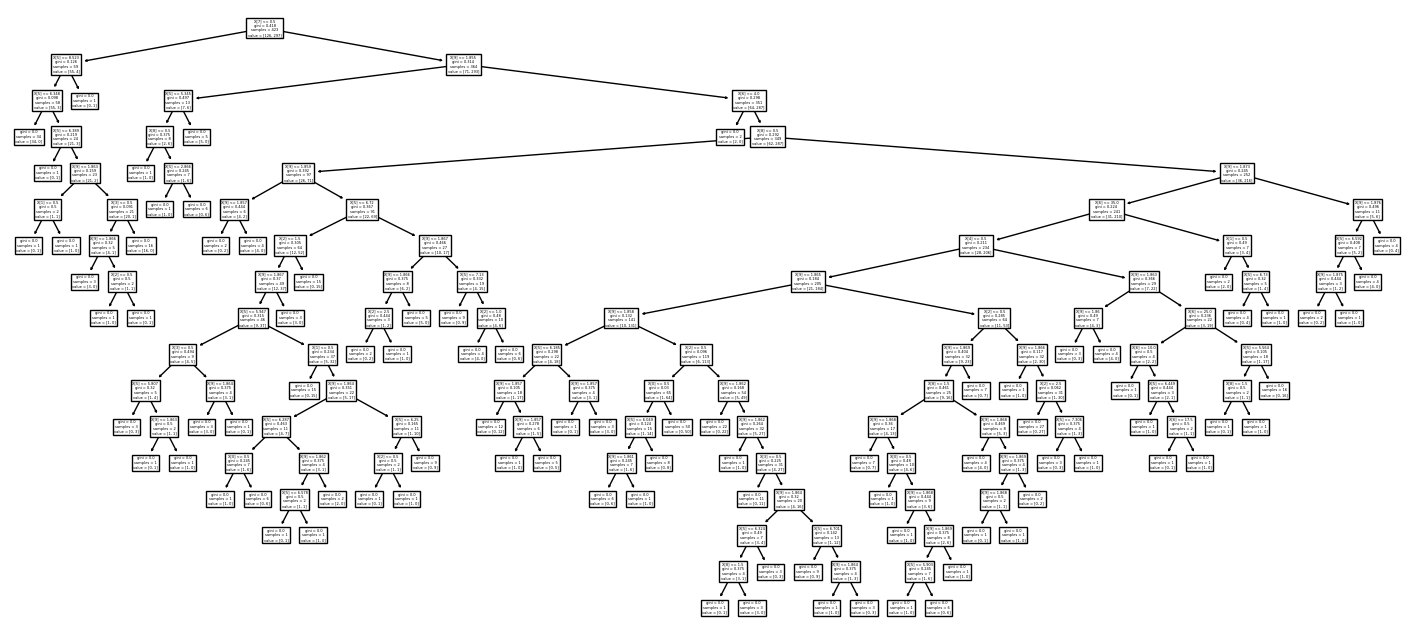

In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=True) 
model.fit(X_train,y_train)

from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [98]:
# so we observed 16 depth
# max_depth = 16 

In [99]:
# In Decision tree hyperparameters are max_depth, criterion['gini','entropy']

In [100]:
# Hyperparameter tuning
estimator = DecisionTreeClassifier(random_state=True)
param_grid = {"criterion":["gini","entropy"],
             "max_depth":list(range(1,16))} # max_depth = 16 # so we check till 16 , it is the maximum number 
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [101]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [102]:
# Important features
feats_ab = pd.DataFrame(data=dt.feature_importances_,
            index=X.columns,
            columns=['Importance'])
important_features_dt = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

In [103]:
# so it is going to give me only one column called as credit history 

In [104]:
# from the dt what we have to do ? 
# first we have to do hyperparmeter tuning 
# best hyperparameters
# best features 
# and using the best hyperparameters and best features we have to create the model 

__Creating Decision Tree Model with important parameters and important features__

In [105]:
# Selecting train & test data 
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

# Modelling
dt.fit(X_train_dt,y_train) # the model is fitted only on the one column credit_history 

# Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


## 5. Random Forest Classifier
- HPT
- identify important features
- Modelling
- Evaluation

In [106]:
# for random forest also same ,using the  best hyperparameters , best features build the model 

In [107]:
# In RandomForest hyperparameter are n_estimators

In [108]:
# Hyper parameter tuning 
estimator = RandomForestClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=21, random_state=True)

In [109]:
# Important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,
            index=X.columns,
            columns=['Importance'])

importance_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
importance_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

__Creating Random Forest Model with important parameters and important features__

In [110]:
X_train_rf = X_train[importance_features_rf]
X_test_rf = X_test[importance_features_rf]

# Modelling
rf.fit(X_train_rf,y_train)

# Evaluation 
ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(rf, X_train_rf, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9952718676122931
CV Score : 0.8203641456582634
Test Accuracy : 0.7735849056603774


## 6. AdaBoost Classifier

In [111]:
# In AdaBoost hyperparameter are n_estimators

In [112]:
# Hyper parameter tuning 
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=3, random_state=True)

In [113]:
# Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
            index=X.columns,
            columns=['Importance'])

importance_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
importance_features_ab

['Credit_History', 'Property_Area', 'Income']

__Creating AdaBoost Model with important parameters and important features__

In [114]:
X_train_ab = X_train[importance_features_ab]
X_test_ab = X_test[importance_features_ab]

# Modelling
ab.fit(X_train_ab,y_train)

# Evaluation 
ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(ab, X_train_ab, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.83451536643026
CV Score : 0.8298879551820729
Test Accuracy : 0.7641509433962265


## 7. Gradient Boost Classifier

In [115]:
# In Gradient Boost hyperparameter are n_estimators and learning_rate

In [116]:
# Hyper parameter tuning 
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,10)),
             "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.6, n_estimators=7, random_state=True)

In [117]:
# Important features
feats_gb = pd.DataFrame(data=gb.feature_importances_,
            index=X.columns,
            columns=['Importance'])

importance_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
importance_features_gb

['Gender',
 'Married',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

__Creating Gradient Boost Model with important parameters and important features__

In [118]:
X_train_gb = X_train[importance_features_gb]
X_test_gb = X_test[importance_features_gb]

# Modelling
gb.fit(X_train_gb,y_train)

# Evaluation 
ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(gb, X_train_gb, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8747044917257684
CV Score : 0.8228011204481793
Test Accuracy : 0.7358490566037735


## 8. XGBoost Classifier

In [119]:
# In XGBoost hyperparameter are n_estimators , max_depth , gamma

In [120]:
# Hyper parameter tuning 
estimator = XGBClassifier()

param_grid = {'n_estimators':[10,20,40,100],
             "max_depth":[3,4,5],
             "gamma":[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [121]:
# Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
            index=X.columns,
            columns=['Importance'])

importance_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
importance_features_xgb

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

__Creating XG Boost Model with important parameters and important features__

In [122]:
X_train_xgb = X_train[importance_features_xgb]
X_test_xgb = X_test[importance_features_xgb]

# Modelling
xgb.fit(X_train_xgb,y_train)

# Evaluation 
ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(xgb, X_train_xgb, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8557919621749409
CV Score : 0.8275070028011206
Test Accuracy : 0.7735849056603774


In [123]:
# so to be more precise bagging and boosting is not good for this dataset, advance algorithm is not good for this dataset
# rf, ab, gb, xgb are overfitted

# rf : Train Accuracy : 0.9952718676122931 , CV Score : 0.8203641456582634 , Test Accuracy : 0.7735849056603774
# ab : Train Accuracy : 0.83451536643026 , CV Score : 0.8298879551820729 , Test Accuracy : 0.7641509433962265
# gb : Train Accuracy : 0.8747044917257684 , CV Score : 0.8228011204481793 , Test Accuracy : 0.7358490566037735
# xgb : Train Accuracy : 0.8557919621749409 , CV Score : 0.8275070028011206 , Test Accuracy : 0.7735849056603774


# so Logistic, KNN, SVM, decision tree within these 4 the best algorithm are there for this dataset 
# Logistic, KNN, SVM, decision tree are not overfitted

# Logistic : Train Accuracy : 0.8226950354609929 , CV Score : 0.8227731092436976 , Test Accuracy : 0.7830188679245284
# KNN : Train Accuracy : 0.7659574468085106 , CV Score : 0.7375630252100841 , Test Accuracy : 0.7264150943396226
# SVM : Train Accuracy : 0.8226950354609929 , CV Score : 0.8227731092436976 , Test Accuracy : 0.7830188679245284
# dt : Train Accuracy : 0.8226950354609929 , CV Score : 0.8227731092436976 , Test Accuracy : 0.7830188679245284

# instead of KNN remaining 3 of them are almost same that is Logistic, SVM and dt (decision tree)

# so now within the decision tree if we see the number of important features it has consider as ['Credit_History'] only 1 column
# based on single column it has concluded 
# and we got best estimator max_depth = 1 , means in the first step only model was completed 
# so based on the credit history if the person have the good credit history means loan accepted and
# if the person have bad bad credit history means loan rejected
# simply based on the credit history we are going to select whether the person is eligible for the loan or not 
# so now all the algorithm logistic, SVM , Decision tree these three are having the test accuracy of 78% out of which 
# decision tree we choose with a max_depth = 1 , this is my final model selection 
# because it is just going to consider only a single column and based on that it simply predict , very fast 
# so compare to every algorithm my best algorithm is finally Decision Tree 
# so dt we save as a joblib file

# Presentation 

In [124]:
from joblib import dump

dump(dt,'loan.joblib')

['loan.joblib']

In [125]:
# now for the future data 
input_data = {'Loan_ID':"LP002991",
              'Gender':"Male",
              'Married':'No',
              'Dependents':1,
              'Education':"Graduate",
              'Self_Employed':'yes',
              'ApplicantIncome':1000,
              'CoapplicantIncome':0,
              
              'LoanAmount':100,
              'Loan_Amount_Term':240,
              'Credit_History':'good',
              'Property_Area':'Urban'}

In [126]:
data = pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,good,Urban


In [127]:
# if you share this data directly to machine it will throw the error 
# so first we do the data preprocessing 

__Apply Data preprocessing on Unknown Data__

In [128]:
# all the steps from data preprocesing we have copy 
data.drop(columns=["Loan_ID"],inplace=True)
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]   
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

data['Dependents'] = data['Dependents'].fillna(0)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data = data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])
data["Dependents"] = data["Dependents"].astype('int') 
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int') 

data["Gender"] = data["Gender"].replace({'Male':1,'Female':0})
data["Married"] = data["Married"].replace({'Yes':1,'No':0})
data["Education"] = data["Education"].replace({'Graduate':1,'Not Graduate':0})
data["Self_Employed"] = data["Self_Employed"].replace({'Yes':1,'No':0})
data["Credit_History"] = data["Credit_History"].replace({'good':1,'bad':0})
data["Property_Area"] = data["Property_Area"].replace({'Rural':0,'Semiurban':1,'Urban':2})
data["Loan_Amount_Term"] = data["Loan_Amount_Term"]/12

X_new = data 

In [129]:
X_new # encoded data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,0,1,1,yes,100,20.0,1,2,1000


In [130]:
# Select Important features of your best model
X_new = X_new[['Credit_History']]

# Apply & Predict using your best model 
dt.predict(X_new)

array([1], dtype=int64)

In [131]:
# so here it is eligible for loan because the Credit_History = 1 , good credit history 

In [132]:
# if the person is having a bad credit history he is not eligible for the loan 
# if the person is having a good credit history he is eligible for the loan

In [133]:
# for this dataset only one important features is there Credit_History as per decision tree 
# that one column is sufficient to predict the answer 

In [134]:
# all the input variable are discrete only 2 continous variable -> but they also by applying boxcox converted to low value  
# if we want to apply PCA try for that one also , in another jupyter notebook, pca is apply only on the input variable , n_component=0.95 is lock
# for continous variable only by selecting the df.iloc and apply the PCA , and compare with pca & without pca which give better accuracy
# we identify the random_state number by applying by using the for loop in the logistic regression that no. only we have to lock for entire project 
# one random_state should be locked  